# 1. Preprocessing

In [1]:
import nltk                                
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
import matplotlib.pyplot as plt            
import random 

In [3]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to C:\Users\Mohammad
[nltk_data]     Zahrawi\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [12]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positive_tweets is: ', type(all_positive_tweets))
print('The type of a tweet entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positive_tweets is:  <class 'list'>
The type of a tweet entry is:  <class 'str'>


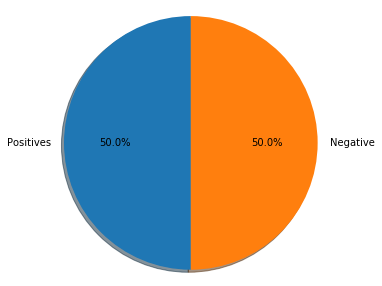

In [16]:
fig = plt.figure(figsize=(5, 5))
labels = ('Positives', 'Negative')
sizes = [len(all_positive_tweets), len(all_negative_tweets)] 
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  
plt.show()

In [50]:
print(all_positive_tweets[random.randint(0,5000)])
print('\n')
print( all_negative_tweets[random.randint(0,5000)])

Thanks Jen...top weekend everyone! :) https://t.co/FjeTSJkmdq


“@Johnny_Spacey: @Mandi_Tinker yes, very inconsiderate of them. :(” why???


In [55]:
# 1. Tokenizing the string
# 2. Lowercasing
# 3. Removing stop words and punctuation
# 4. Stemming

In [56]:
tweet = all_positive_tweets[2277]
print(tweet)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i


In [59]:
import re                                  
import string      # for string operations
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Mohammad
[nltk_data]     Zahrawi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Remove hyperlinks,  Twitter marks and styles


In [109]:
print( tweet)
# remove old style retweet text "RT"
tweet2 = re.sub(r'^RT[\s]+', '', tweet)
# remove hyperlinks
tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
# remove hashtags
tweet2 = re.sub(r'#', '', tweet2)
print(tweet2)

My beautiful sunflowers on a sunny Friday morning off :) #sunflowers #favourites #happy #Friday off… https://t.co/3tfYom0N1i
My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 


In [110]:
print(tweet2)
tweet_tokens = nltk.word_tokenize(tweet2)
print('Tokenized string:\n')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
Tokenized string:

['My', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'Friday', 'morning', 'off', ':', ')', 'sunflowers', 'favourites', 'happy', 'Friday', 'off…']


In [111]:
print(tweet2)
# instantiate tokenizer class
tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
tweet_tokens = tokenizer.tokenize(tweet2)
print('Tokenized string:\n')
print(tweet_tokens)

My beautiful sunflowers on a sunny Friday morning off :) sunflowers favourites happy Friday off… 
Tokenized string:

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']


In [112]:
# see the difference between tokenize and TweetTokenizer

In [117]:
stopwords_english = stopwords.words('english') 
print('Stop words\n')
print(stopwords_english[:5])
print('\nPunctuation\n')
print(string.punctuation)

Stop words

['i', 'me', 'my', 'myself', 'we']

Punctuation

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [120]:
print(tweet_tokens)
tweets_clean = []

for word in tweet_tokens: # Go through every word in your tokens list
    if (word not in stopwords_english and word not in string.punctuation):
        tweets_clean.append(word)

print('\nremoved stop words and punctuation:')
print(tweets_clean)

['my', 'beautiful', 'sunflowers', 'on', 'a', 'sunny', 'friday', 'morning', 'off', ':)', 'sunflowers', 'favourites', 'happy', 'friday', 'off', '…']

removed stop words and punctuation:
['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']


### Stemming

In [123]:
print(tweets_clean)
stemmer = PorterStemmer() 
tweets_stem = [] 

for word in tweets_clean:
    stem_word = stemmer.stem(word)  # stemming word
    tweets_stem.append(stem_word)  # append to the list

print('\nstemmed words:')
print(tweets_stem)

['beautiful', 'sunflowers', 'sunny', 'friday', 'morning', ':)', 'sunflowers', 'favourites', 'happy', 'friday', '…']

stemmed words:
['beauti', 'sunflow', 'sunni', 'friday', 'morn', ':)', 'sunflow', 'favourit', 'happi', 'friday', '…']


In [262]:
def process_tweet(tweet):
    tweet2 = re.sub(r'^RT[\s]+', '', tweet)
    tweet2 = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet2)
    tweet2 = re.sub(r'#', '', tweet2)    
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet2)
    
    tweets_clean = []
    for word in tweet_tokens: 
        if (word not in stopwords_english and word not in string.punctuation):
            tweets_clean.append(word)
    stemmer = PorterStemmer() 
    tweets_stem = [] 
    for word in tweets_clean:
        stem_word = stemmer.stem(word) 
        tweets_stem.append(stem_word)  
    return tweets_stem

In [263]:
process_tweet(tweets[5])

['one', 'irresist', ':)', 'flipkartfashionfriday']

# Building word frequencies

In [266]:
import numpy as np
tweets = all_positive_tweets + all_negative_tweets
print("Number of tweets: ", len(tweets))

Number of tweets:  10000


In [267]:
labels = np.append(np.ones((len(all_positive_tweets))), np.zeros((len(all_negative_tweets))))
len(labels)

10000

In [268]:
dictionary = {'key1': 1, 'key2': 2}
print(dictionary)
dictionary['key3'] = -5
print(dictionary)
print(dictionary['key2'])
print("item found: ", dictionary.get('key10', -1))

{'key1': 1, 'key2': 2}
{'key1': 1, 'key2': 2, 'key3': -5}
2
item found:  -1


### Word frequency dictionary

In [269]:
# this code is not part of the project, just more explaination.
x = np.array([[[0], [1], [2]]])
print(x.shape)
print((x.squeeze().shape))
print(x.squeeze())
print(np.squeeze(x, axis=2).shape)
print(np.squeeze(x))

(1, 3, 1)
(3,)
[0 1 2]
(1, 3)
[0 1 2]


In [270]:
# this code is not part of the project, just more explaination.
arr = np.array([[1, 2, 3], [4, 5, 6]])
print(arr)
list1 = arr.tolist()
print(list1)
print(list(arr))

[[1 2 3]
 [4 5 6]]
[[1, 2, 3], [4, 5, 6]]
[array([1, 2, 3]), array([4, 5, 6])]


In [271]:
# this code is not part of the project, just more explaination.
a = ("Mohammad", "Husni", "zahrawi")
b = ("first", "second", "last", "number")
x=zip(b,a,)
print(tuple(x))
print('')
x=zip(a,b,a)
x=set(x)
print(tuple(x))
print('')
for name,title in zip(a,b):
    print(name)

(('first', 'Mohammad'), ('second', 'Husni'), ('last', 'zahrawi'))

(('Husni', 'second', 'Husni'), ('Mohammad', 'first', 'Mohammad'), ('zahrawi', 'last', 'zahrawi'))

Mohammad
Husni
zahrawi


In [272]:
def build_freqs(tweets, ys):
    yslist = np.squeeze(ys).tolist()
    freqs={}
    for y,tweet in zip(yslist,tweets):
        for word in process_tweet(tweet):
            pair = (word,y)
            if pair in freqs:
                freqs[pair]+=1
            else:
                freqs[pair]=1
    return freqs

In [274]:
freqs = build_freqs(tweets, labels)
print('type of freq',type(freqs))
print('length of freq',len(freqs))

type of freq <class 'dict'>
length of freq 13066


In [282]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


### Table of word counts

In [323]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']
data = []
for word in keys:
    pos = 0
    neg = 0
    if (word,1) in freqs:
        pos = freqs[(word,1)]
    if (word,0) in freqs:
        neg = freqs[(word,0)]
    data.append([word,pos,neg])
print(data)

[['happi', 211, 25], ['merri', 1, 0], ['nice', 98, 19], ['good', 238, 101], ['bad', 18, 73], ['sad', 5, 123], ['mad', 4, 11], ['best', 65, 22], ['pretti', 20, 15], ['❤', 29, 21], [':)', 3568, 2], [':(', 1, 4571], ['😒', 1, 3], ['😬', 0, 2], ['😄', 5, 1], ['😍', 2, 1], ['♛', 0, 210], ['song', 22, 27], ['idea', 26, 10], ['power', 7, 6], ['play', 46, 48], ['magnific', 2, 0]]


D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56850 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56876 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:176: RuntimeWarning: Glyph 128556 missing from current font.
  font.load_char(ord(s), flags=flags)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\SOFTWARES DATA SCIENCE\Anaconda\lib\site-packages\matplotlib\backends\

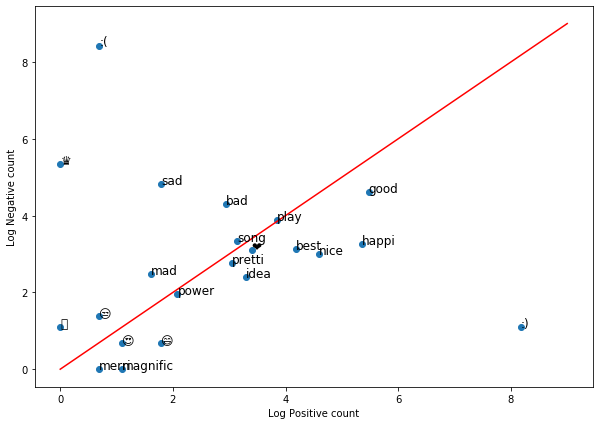

In [325]:
plt.figure(figsize=(10,7))
plt.scatter(x,y)
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")
plt.plot([0, 9], [0, 9], color = 'red')
for i in range(0, len(data)):
    plt.annotate(data[i][0], (x[i], y[i]), fontsize=12)

# Logistic Regression

In [326]:
from os import getcwd
import pandas as pd

In [366]:
test_pos = all_positive_tweets[4000:]
train_pos = all_positive_tweets[:4000]
test_neg = all_negative_tweets[4000:]
train_neg = all_negative_tweets[:4000]

train_x = train_pos + train_neg 
test_x = test_pos + test_neg

In [367]:
# combine positive and negative labels
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [368]:
# Print the shape train and test sets
print("train_y.shape = " + str(train_y.shape))
print("test_y.shape = " + str(test_y.shape))

train_y.shape = (8000, 1)
test_y.shape = (2000, 1)


In [369]:
# test the function below
print('This is an example of a positive tweet: \n', train_x[0])
print('\nThis is an example of the processed version of the tweet: \n', process_tweet(train_x[0]))

This is an example of a positive tweet: 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)

This is an example of the processed version of the tweet: 
 ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


###  Sigmoid


In [382]:
# UNQ_C1 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def sigmoid(z): 
    '''
    Input:
        z: is the input (can be a scalar or an array)
    Output:
        h: the sigmoid of z
    '''
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # calculate the sigmoid of z
    h = 1/(1+np.exp(-z))
    ### END CODE HERE ###
    
    return h

In [383]:
# Testing your function 
if (sigmoid(0) == 0.5):
    print('SUCCESS!')
else:
    print('Oops!')

if (sigmoid(4.92) == 0.9927537604041685):
    print('CORRECT!')
else:
    print('Oops again!')

SUCCESS!
CORRECT!


### Implement gradient descent function

In [384]:
# UNQ_C2 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def gradientDescent(x, y, theta, alpha, num_iters):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    
    m = len(x)
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = 1/(1+np.exp(-z))
        
        # calculate the cost function
        J = (-1/m)*(np.dot(y.transpose(),np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))

        # update the weights theta
        theta = theta - ((alpha/m)*np.dot(x.transpose(),(h-y)))
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta

In [385]:
# Check the function
# Construct a synthetic test case using numpy PRNG functions
np.random.seed(1)
# X input is 10 x 3 with ones for the bias terms
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
# Y Labels are 10 x 1
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

# Apply gradient descent
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

The cost after training is 0.67094970.
The resulting vector of weights is [4.1e-07, 0.00035658, 7.309e-05]


### Extracting the features

In [386]:
# UNQ_C3 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def extract_features(tweet, freqs):
    '''
    Input: 
        tweet: a list of words for one tweet
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
    Output: 
        x: a feature vector of dimension (1,3)
    '''
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # loop through each word in the list of words
    for word in word_l:        
          
        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word,1),0)
        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word,0),0)

 
    ### END CODE HERE ###
    assert(x.shape == (1, 3))
    return x

In [387]:
# Check your function

# test 1
# test on training data
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.764e+03 7.200e+01]]


In [388]:
# check for when the words are not in the freqs dictionary
tmp2 = extract_features('blorb bleeeeb bloooob', freqs)
print(tmp2)

[[1. 0. 0.]]


### Training Your Model

In [389]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)
print(f"The cost after training is {J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.19514901.
The resulting vector of weights is [7e-08, 0.00054222, -0.00054311]


### Test your logistic regression

In [390]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def predict_tweet(tweet, freqs, theta):
    '''
    Input: 
        tweet: a string
        freqs: a dictionary corresponding to the frequencies of each tuple (word, label)
        theta: (3,1) vector of weights
    Output: 
        y_pred: the probability of a tweet being positive or negative
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # extract the features of the tweet and store it into x
    x = extract_features(tweet,freqs)
    
    # make the prediction using x and theta
    
    y_pred = sigmoid(np.dot(x,theta))
    
    ### END CODE HERE ###
    
    return y_pred

In [391]:
# Run this cell to test your function
for tweet in ['I am happy', 'I am bad', 'this movie should have been great.', 'great', 'great great', 'great great great', 'great great great great']:
    print( '%s -> %f' % (tweet, predict_tweet(tweet, freqs, theta)))

I am happy -> 0.525187
I am bad -> 0.492529
this movie should have been great. -> 0.520177
great -> 0.520182
great great -> 0.540298
great great great -> 0.560284
great great great great -> 0.580076


In [392]:
# Feel free to check the sentiment of your own tweet below
my_tweet = 'I am learning :)'
predict_tweet(my_tweet, freqs, theta)

array([[0.87382283]])

### Check performance using the test set

In [393]:
# UNQ_C5 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def test_logistic_regression(test_x, test_y, freqs, theta):
    """
    Input: 
        test_x: a list of tweets
        test_y: (m, 1) vector with the corresponding labels for the list of tweets
        freqs: a dictionary with the frequency of each pair (or tuple)
        theta: weight vector of dimension (3, 1)
    Output: 
        accuracy: (# of tweets classified correctly) / (total # of tweets)
    """
    
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    # the list for storing predictions
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            # append 1.0 to the list
            y_hat.append(1)
        else:
            # append 0 to the list
            y_hat.append(0)

    # With the above implementation, y_hat is a list, but test_y is (m,1) array
    # convert both to one-dimensional arrays in order to compare them using the '==' operator
    counter=0
    test_y=test_y.squeeze()
    for i in range(len(test_y)):
        if test_y[i]==y_hat[i]:
            counter+=1
    
    accuracy = counter/len(test_y)
    

    ### END CODE HERE ###
    
    return accuracy

In [394]:
tmp_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {tmp_accuracy:.4f}")

Logistic regression model's accuracy = 0.9965


In [395]:
# Feel free to change the tweet below
my_tweet = 'This is a ridiculously bright movie. The plot was terrible and I was sad until the ending!'
print(process_tweet(my_tweet))
y_hat = predict_tweet(my_tweet, freqs, theta)
print(y_hat)
if y_hat > 0.5:
    print('Positive sentiment')
else: 
    print('Negative sentiment')

['ridicul', 'bright', 'movi', 'plot', 'terribl', 'sad', 'end']
[[0.47922591]]
Negative sentiment
